# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [33]:
# imports
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [34]:
ruta = "/content/dataset_banco_clean.csv"
data = pd.read_csv(ruta)

In [35]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

In [36]:
## A completar

# Conclusiones

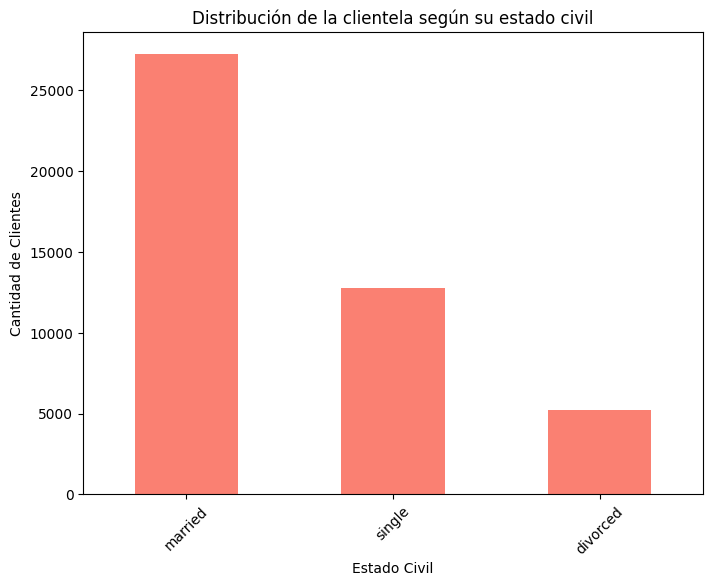

In [37]:
plt.figure(figsize=(8, 6))
data['marital'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de la clientela según su estado civil')
plt.xticks(rotation=45)
plt.show()

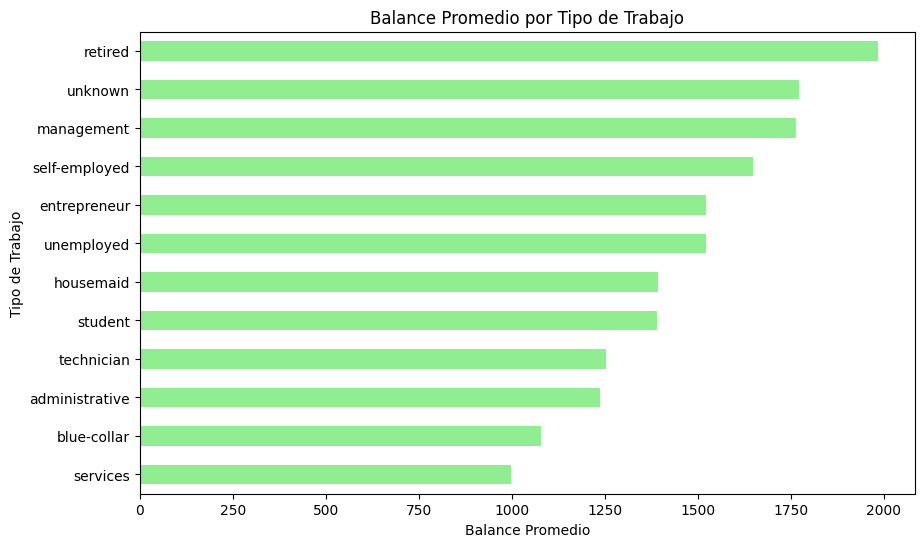

In [38]:
plt.figure(figsize=(10, 6))
data.groupby('job')['balance'].mean().sort_values().plot(kind='barh', color='lightgreen')
plt.xlabel('Balance Promedio')
plt.ylabel('Tipo de Trabajo')
plt.title('Balance Promedio por Tipo de Trabajo')
plt.show()

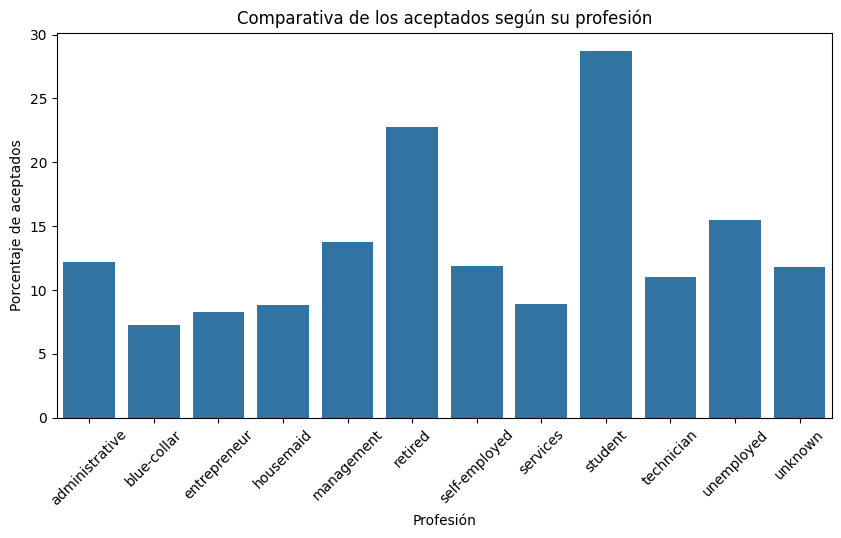

In [45]:
data_y = data[data['y'] == 'yes']

job_counts_total = data['job'].value_counts()
job_counts_y = data_y['job'].value_counts()
percentage_y = (job_counts_y / job_counts_total) * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=percentage_y.index, y=percentage_y.values)
plt.title("Comparativa de los aceptados según su profesión")
plt.xlabel("Profesión")
plt.ylabel("Porcentaje de aceptados")
plt.xticks(rotation=45)
plt.show()

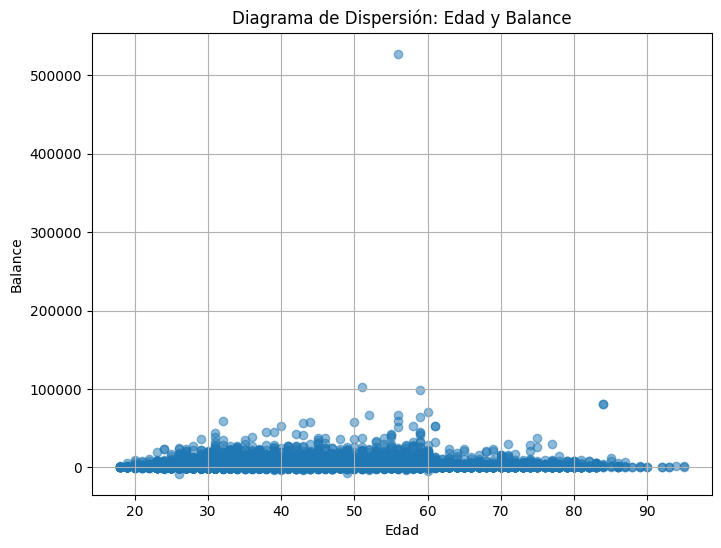

In [49]:
age = data['age']
balance = data['balance']

plt.figure(figsize=(8, 6))
plt.scatter(age, balance, alpha=0.5)
plt.title('Diagrama de Dispersión: Edad y Balance')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

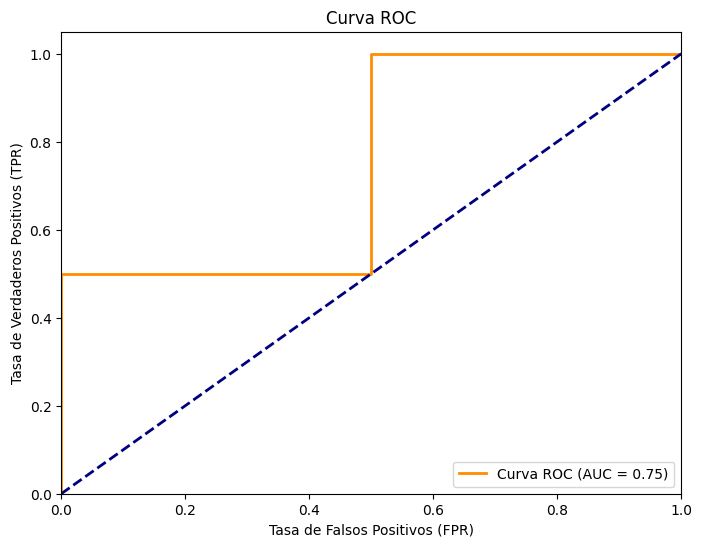

In [51]:
from sklearn.metrics import roc_curve, auc

# Supongamos que tienes las probabilidades predichas por tu modelo
# y las verdaderas etiquetas de prueba
y_true = np.array([0, 0, 1, 1])
y_pred_probs = np.array([0.1, 0.4, 0.35, 0.8])  # Probabilidades predichas

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
#Al ser el área bajo la curva ROC de 0.75, puede considerarse como un rendimiento aceptable.

Se ha decidido eliminar las columna "contact" y "education", ya que a nivel informativo pueden ser interesantes pero a la hora de tomar los datos, en el caso de haber más variables y pudiesen ser objeto de estudio, se estudiarían más a fondo, pero, en este caso, son prescindibles. Unido al mismo campo, se decidió eliminar la columna "duration", siendo esta relevante para la llamada de contacto pero que, de por sí sola, no aporta ningún extra al resto de campos y datos a analizar.